In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

In [2]:
adj_list_1 = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4, 5],
    4: [3, 5],
    5: [3, 4]
}


In [3]:
adj_list_2 = {
    0: [1, 2, 6],
    1: [0, 2, 7],
    2: [0, 1, 8],
    3: [4, 5, 6],
    4: [3, 5, 7],
    5: [3, 4, 8],
    6: [0, 3, 7],  # bridge between first and second cluster
    7: [1, 4, 6, 8],
    8: [2, 5, 7]
}


In [4]:
# Adjacency list for the SBM with 3 partitions (10 nodes each)
adj_list_4 = {
    0:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13],
    1:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14],
    2:  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10],
    3:  [0, 1, 2, 4, 5, 6, 7, 8, 9],
    4:  [0, 1, 2, 3, 5, 6, 7, 8, 9],
    5:  [0, 1, 2, 3, 4, 6, 7, 8, 9, 11],
    6:  [0, 1, 2, 3, 4, 5, 7, 8, 9],
    7:  [0, 1, 2, 3, 4, 5, 6, 8, 9],
    8:  [0, 1, 2, 3, 4, 5, 6, 7, 9, 12],
    9:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 13],
    
    10: [2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0],
    11: [5, 10, 12, 13, 14, 15, 16, 17, 18, 19],
    12: [1, 8, 10, 11, 13, 14, 15, 16, 17, 18],
    13: [0, 9, 10, 11, 12, 14, 15, 16, 17, 18],
    14: [1, 10, 11, 12, 13, 15, 16, 17, 18, 19],
    15: [10, 11, 12, 13, 14, 16, 17, 18, 19],
    16: [10, 11, 12, 13, 14, 15, 17, 18, 19],
    17: [10, 11, 12, 13, 14, 15, 16, 18, 19],
    18: [10, 11, 12, 13, 14, 15, 16, 17, 19],
    19: [10, 11, 12, 13, 14, 15, 16, 17, 18],
    
    20: [21, 22, 23, 24, 25, 26, 27, 28, 29, 0],
    21: [20, 22, 23, 24, 25, 26, 27, 28, 29],
    22: [20, 21, 23, 24, 25, 26, 27, 28, 29],
    23: [20, 21, 22, 24, 25, 26, 27, 28, 29],
    24: [20, 21, 22, 23, 25, 26, 27, 28, 29],
    25: [20, 21, 22, 23, 24, 26, 27, 28, 29],
    26: [20, 21, 22, 23, 24, 25, 27, 28, 29],
    27: [20, 21, 22, 23, 24, 25, 26, 28, 29],
    28: [20, 21, 22, 23, 24, 25, 26, 27, 29],
    29: [20, 21, 22, 23, 24, 25, 26, 27, 28],
}


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the classic karate club graph
G = nx.karate_club_graph()

# Plot it
# plt.figure(figsize=(6,6))
# nx.draw(G, with_labels=True, node_size=500, font_color='white')
# plt.title("Zachary's Karate Club Graph")
# plt.show()

# Get adjacency list as a Python dict
adj_list_k = {node: list(G.neighbors(node)) for node in G.nodes()}
print(adj_list_k)


{0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31], 1: [0, 2, 3, 7, 13, 17, 19, 21, 30], 2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32], 3: [0, 1, 2, 7, 12, 13], 4: [0, 6, 10], 5: [0, 6, 10, 16], 6: [0, 4, 5, 16], 7: [0, 1, 2, 3], 8: [0, 2, 30, 32, 33], 9: [2, 33], 10: [0, 4, 5], 11: [0], 12: [0, 3], 13: [0, 1, 2, 3, 33], 14: [32, 33], 15: [32, 33], 16: [5, 6], 17: [0, 1], 18: [32, 33], 19: [0, 1, 33], 20: [32, 33], 21: [0, 1], 22: [32, 33], 23: [25, 27, 29, 32, 33], 24: [25, 27, 31], 25: [23, 24, 31], 26: [29, 33], 27: [2, 23, 24, 33], 28: [2, 31, 33], 29: [23, 26, 32, 33], 30: [1, 8, 32, 33], 31: [0, 24, 25, 28, 32, 33], 32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33], 33: [8, 9, 13, 14, 15, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 22]}


## Start 

In [6]:
a = int(input("1 for already partitioned, 2 for random from GPT, 3 for karate club, 4 for 3 clusters"))

adj = {1:adj_list_1, 2:adj_list_2, 3:adj_list_k, 4:adj_list_4}

adj_list = adj[a]

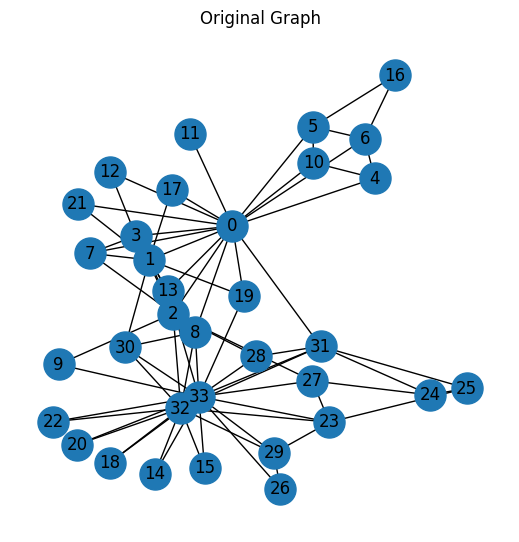

In [7]:
G = nx.Graph(adj_list)

# Layout
pos = nx.spring_layout(G, seed=42)

# Plot without colors (default is light blue nodes)
plt.figure(figsize=(5,5))
nx.draw(G, pos, with_labels=True, node_size=500, font_color='black')
plt.title("Original Graph")
plt.show()

In [8]:
def make_adj_mat(adj_list):
    n = len(adj_list)
    adj_mat = np.zeros((n,n), dtype = int)
    degree_mat = np.zeros((n,n), dtype = int)
    for key, val in adj_list.items():
        for value in val:
            adj_mat[key][value] = 1
        degree_mat[key][key] = len(val)


    return adj_mat, degree_mat

A,D = make_adj_mat(adj_list)

L = D-A

eigval, eigvectors = np.linalg.eigh(L)
idx = eigval.argsort() # sort by eigenvalues

e2 = eigvectors[:, idx][:, 1] # get 2nd eigenvector

In [9]:
e2

array([-0.11213743, -0.04128789,  0.02321896, -0.05549978, -0.28460453,
       -0.32372722, -0.32372722, -0.052586  ,  0.05160128,  0.09280089,
       -0.28460453, -0.21099295, -0.1094613 , -0.01474197,  0.16275078,
        0.16275078, -0.42276533, -0.10018142,  0.16275078, -0.01363713,
        0.16275078, -0.10018142,  0.16275078,  0.15569457,  0.15302558,
        0.16096292,  0.18710956,  0.12766405,  0.0951523 ,  0.16765031,
        0.07349964,  0.09875343,  0.13034546,  0.11890326])

In [10]:

## My way
# partitions = {0:[], 1:[]}

# for i, val in enumerate(e2):
#     if val<0:
#         partitions[0].append(i)
#     else:
#          partitions[1].append(i)


# Vectorized way - for longer lists - much more efficient (parallel)

e2 = np.array(e2)  # make sure e2 is a numpy array

partitions = {
    0: np.where(e2 < 0)[0].tolist(),
    1: np.where(e2 >= 0)[0].tolist()
}
        

In [11]:
partitions

{0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 1: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]}

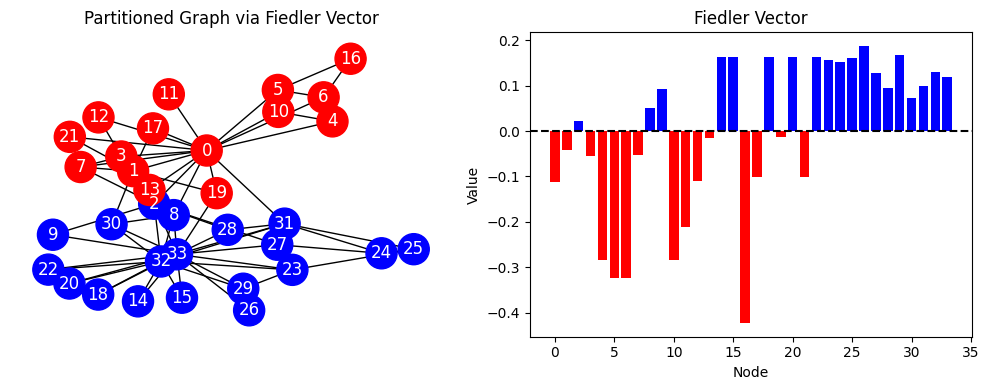

In [12]:
# Plot graph with partition
G = nx.Graph(adj_list)
colors = ['red' if node in partitions[0] else 'blue' for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10,4))

# Left: partitioned graph
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.title("Partitioned Graph via Fiedler Vector")

# Right: Fiedler vector plot
plt.subplot(1, 2, 2)
plt.bar(range(len(e2)), e2, color=['red' if val < 0 else 'blue' for val in e2])
plt.axhline(0, color='black', linestyle='--')
plt.title("Fiedler Vector")
plt.xlabel("Node")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [16]:

_vects_2_3_4 = eigvectors[:, idx][:, 1:4] # get 2, 3, 4 eigenvectors - 3D - 3 n dim vectors
X = _vects_2_3_4

kmeans = KMeans(n_clusters = 2, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X)

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

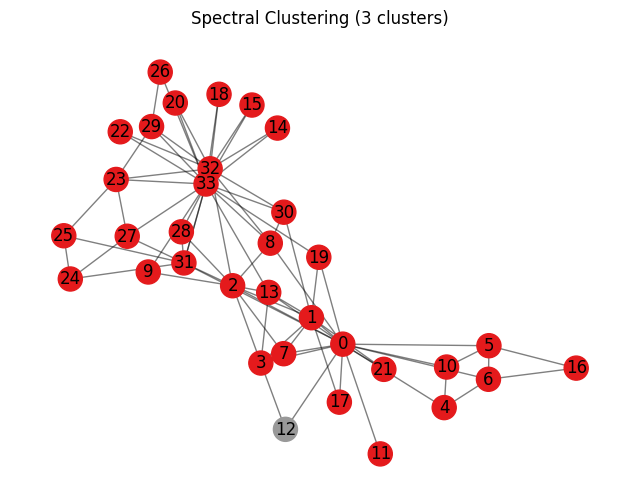

In [18]:
G = nx.Graph()
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.Set1, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Spectral Clustering (3 clusters)")
plt.axis("off")
plt.show()